<a href="https://colab.research.google.com/github/Vegitaa/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

##  Step 1:- read the data

In [2]:
import pandas as pd
url='https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv'
df=pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


Target feature here is PE(Power Plant Energy output)

## Step 2 : Perform basic data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
df.duplicated().sum()

41

In [8]:
df.duplicated().sum()/len(df)

0.004285117056856187

## Step 3:- Seprate the X and Y (PE)

In [9]:
x=df.drop(columns=['PE'])
y=df[['PE']]

In [10]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4:- Create a processing pipeline for X

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy="mean")),
    ('scalar', StandardScaler())
]).set_output(transform='pandas')

In [17]:
X_pre = num_pipe.fit_transform(x)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [21]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [22]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [23]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [24]:
xtrain.shape[1]

4

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [26]:

# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [29]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 4ms/step - loss: 206771.9688 - mae: 454.4147 - val_loss: 205267.0000 - val_mae: 452.7688
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 204427.7031 - mae: 451.8750 - val_loss: 201548.0000 - val_mae: 448.7272
Epoch 3/100
192/192 [==============================] - 1s 7ms/step - loss: 198094.0156 - mae: 444.8967 - val_loss: 191827.6875 - val_mae: 437.8449
Epoch 4/100
192/192 [==============================] - 2s 8ms/step - loss: 183080.2812 - mae: 427.5998 - val_loss: 169903.3438 - val_mae: 411.7998
Epoch 5/100
192/192 [==============================] - 1s 7ms/step - loss: 151244.0156 - mae: 387.5091 - val_loss: 128991.6641 - val_mae: 356.8739
Epoch 6/100
192/192 [==============================] - 2s 8ms/step - loss: 106292.7109 - mae: 320.5592 - val_loss: 83061.0156 - val_mae: 279.3158
Epoch 7/100
192/192 [==============================] - 1s 7ms/step - loss: 64612.5195 - mae: 238.8945 - val_loss: 48398

### Evaluate the model in train and test

In [30]:
model.evaluate(xtrain, ytrain)


240/240 [==============================] - 1s 3ms/step - loss: 20.3768 - mae: 3.5444


[20.37681007385254, 3.544379949569702]

In [31]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 18.6363 - mae: 3.4259


[18.636272430419922, 3.425865650177002]

### Plot the learning curve

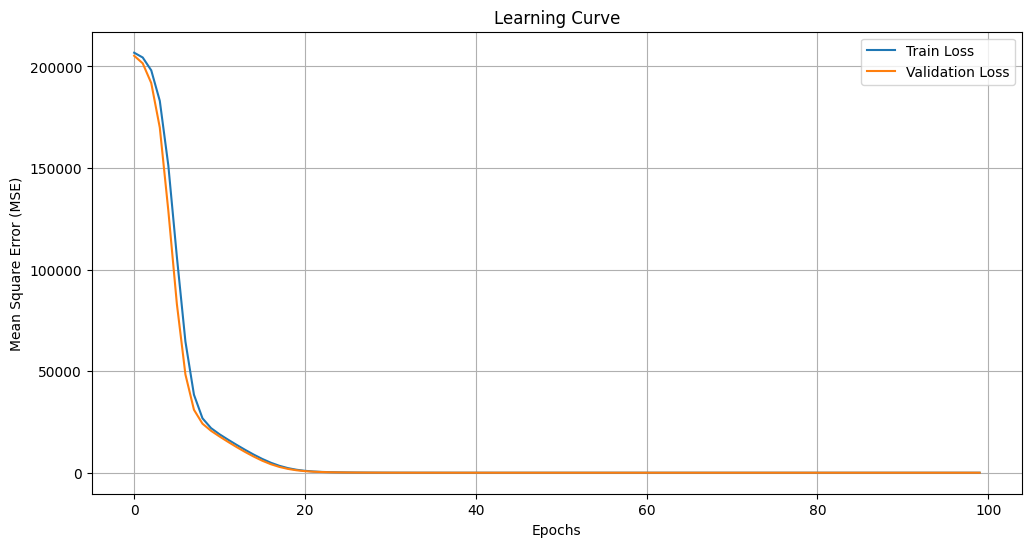

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

### Predict the results for train and test

In [33]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [34]:
ypred_train[0:5]

array([[441.24823],
       [435.14307],
       [434.00366],
       [429.10815],
       [431.59845]], dtype=float32)

In [35]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [36]:
ypred_test[0:5]

array([[434.51407],
       [436.7319 ],
       [461.07312],
       [476.50168],
       [434.46573]], dtype=float32)

In [37]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Perform detailed evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [40]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 0s 2ms/step
Mean Squared Error : 20.38
Root Mean Squared Error : 4.51
Mean Absolute Error : 3.54
R2 Score : 0.9303


In [41]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 1ms/step
Mean Squared Error : 18.64
Root Mean Squared Error : 4.32
Mean Absolute Error : 3.43
R2 Score : 0.9349


### R2 score in test is 0.9336 > 0.8 hence above model is very good
### Saving above model (.keras)

In [42]:
model.save('PowerOutput.keras')

### Load the above model

In [43]:
from keras.models import load_model


In [44]:
m = load_model('/content/PowerOutput.keras')

In [45]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.9326466 , -0.21710324, -0.73811775, -0.7255978 ,  1.2135922 ,
         -1.2407401 ,  0.5316396 , -0.54978716],
        [ 0.89966655,  0.95216304, -1.2552062 , -0.4310046 ,  0.38956928,
         -1.1635684 ,  1.2035766 , -0.4625746 ],
        [ 0.20622174, -0.8851082 ,  0.19992286,  0.07460151, -0.16655026,
          0.2240979 ,  0.2923245 ,  0.12802161],
        [-0.17786436, -0.35939053, -0.20773882,  0.5403359 , -0.5082017 ,
          0.05803727, -0.14235683,  0.5841237 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.4292228, 3.6647537, 3.8538392, 3.9311066, 4.007928 , 3.7509317,
        3.8166142, 3.7405586], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.1683466 ,  2.1238418 ,  0.42789444,  0.5773115 ],
        [ 2.418518  ,  2.5202637 , -0.21188135,  0.02093928],
        [ 3.121902  ,  2.3801432 , -0.5666248 , 